# <font color='#00008B'><u>GeoWomen Datathon</u></font>
### The Food Rescuers
Reducing food waste and shrinking hunger


## Problem Statement
 "Examining food waste in Calgary to identify optimal locations for community food pantries 
  to mitigate food insecurity. "

## Loading Liberaries 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
%matplotlib inline
import time
import sys
import csv
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.graph_objects as go
import plotly.express as px
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

## Loading CSV files

In [2]:
#Loading csv file to dataframe
food_data = pd.read_csv('Food_rescuers_data.csv') 
income_data = pd.read_csv('Low_Income_household.csv')
pantry_data = pd.read_csv('Pantries_location.csv')

In [3]:
food_data.head()

,Timestamp,Are you eating food past their expiration dates more or less often since pandemic?,What do you think are the main reasons that food get wasted in your household?(select all that apply),Select the option which best reflects what is happening in your household since the start of pandemic?,What are you doing differently since start of pandemic? (select all apply),Ward
0,2021/06/09 12:15:01 PM CDT,More often,We do not waste any food in our household,We are wasting less food in amount but not ove...,I am eating leftovers more often;I look in my ...,NaN
1,2021/06/09 12:17:09 PM CDT,About the same,Food goes bad before 'best before' date;We don...,We are wasting more food in amount,I have not change anything,NaN
2,2021/06/09 12:47:28 PM CDT,About the same,Food left in the fridge or freezer too long;We...,"We are wasting less food, in amount and overal...",I look in my fridge and pantries more often,NaN
3,2021/06/09 12:47:50 PM CDT,About the same,Some household members do not finish their meals,"We are wasting less food, in amount and overal...",I am eating leftovers more often;I am planning...,NaN
4,2021/06/09 12:52:28 PM CDT,More often,Food left in the fridge or freezer too long;We...,We are wasting less food in amount but not ove...,I look in my fridge and pantries more often,NaN


## Low income household percentage

In [4]:
income_data['Percentage'] = (income_data['Low_income_households']/income_data['Total Household'])*100
income_data

,Ward,Total Household,UnderPovertyLine_households,Low_income_households,Percentage
0,Ward 11,45465,3160,5555,12.218190
1,Ward 7,32245,3220,4910,15.227167
2,Ward 8,43975,4185,5985,13.610006
3,Ward 1,33570,1615,3025,9.011022
4,Ward 3,22670,770,1525,6.726952
5,Ward 12,34865,870,1725,4.947655
6,Ward 2,27355,865,1910,6.982270
7,Ward 4,38530,2310,4920,12.769271
8,Ward 14,31670,920,2080,6.567730
9,Ward 5,22560,790,2090,9.264184


In [5]:
query_low_income = income_data [income_data['Percentage']>10]

## Proposed location of Pantries based on Low income households in Wards

In [6]:
query_low_income

,Ward,Total Household,UnderPovertyLine_households,Low_income_households,Percentage
0,Ward 11,45465,3160,5555,12.218190
1,Ward 7,32245,3220,4910,15.227167
2,Ward 8,43975,4185,5985,13.610006
7,Ward 4,38530,2310,4920,12.769271
10,Ward 10,30915,1690,4040,13.068090
11,Ward 9,37490,2950,6235,16.631102


## Current locations of Pantries

In [20]:
pantry_data

,Pantries,Address,Lat,Long,Ward
0,Deer Park United Church Food Pantry,77 Deerpoint Rd SE,50.926620,-114.028070,Ward 14
1,Abbeydale Christian Fellowship Community Cupboard,1352 Abbeydale Drive SE,51.051312,-113.930226,Ward 9
2,Bonavista Church Food Pantry,1509 Lake Ontario Drive SE,50.942383,-114.034286,Ward 14
3,Victory Foundation Eastside Victory Outreach,1840 – 38 Street SE,51.036663,-113.978275,Ward 9
4,West Central Community Resource Centre,3507A – 17 Avenue SW,51.037682,-114.137365,Ward 8
5,Coventry Hills Little Free Pantry Initiative,90 Covepark Sq NE,51.166068,-114.059481,Ward 3
6,Falconridge Free food pantry,"3 Falworth Pl NE, Calgary, AB T3J 1G1",51.100020,-113.950353,Ward 4
7,Abbeydale Little Free Pantry,"57 Aberdare Rd NE Calgary, Alberta T2A 6V8",51.054933,-113.924408,Ward 9
8,Crescent heights community fridge,"902 Centre St N, Calgary, AB T2E 2P7",51.060114,-114.062289,Ward 7
9,Robert McClure United Church Food Pantry,5510 -26 Avenue NE,51.077585,-113.954876,Ward 10


# Merging the wards data to survey data

In [8]:
merge_data = food_data.merge(query_low_income, on='Ward')
merge_data.shape

(23, 10)

## Joining the dataset with the existing pantries

In [9]:
merge_data = pd.merge( merge_data, pantry_data, how="outer", on=["Ward"])

In [10]:
merge_data.tail()

,Timestamp,Are you eating food past their expiration dates more or less often since pandemic?,What do you think are the main reasons that food get wasted in your household?(select all that apply),Select the option which best reflects what is happening in your household since the start of pandemic?,What are you doing differently since start of pandemic? (select all apply),Ward,Total Household,UnderPovertyLine_households,Low_income_households,Percentage,Pantries,Address,Lat,Long
26,2021/06/10 10:05:39 AM CDT,About the same,Food left in the fridge or freezer too long,"We are wasting less food, in amount and overal...",I am using more produce,Ward 9,37490.0,2950.0,6235.0,16.631102,Abbeydale Little Free Pantry,"57 Aberdare Rd NE Calgary, Alberta T2A 6V8",51.054933,-113.924408
27,NaN,NaN,NaN,NaN,NaN,Ward 14,NaN,NaN,NaN,NaN,Deer Park United Church Food Pantry,77 Deerpoint Rd SE,50.926620,-114.028070
28,NaN,NaN,NaN,NaN,NaN,Ward 14,NaN,NaN,NaN,NaN,Bonavista Church Food Pantry,1509 Lake Ontario Drive SE,50.942383,-114.034286
29,NaN,NaN,NaN,NaN,NaN,Ward 3,NaN,NaN,NaN,NaN,Coventry Hills Little Free Pantry Initiative,90 Covepark Sq NE,51.166068,-114.059481
30,NaN,NaN,NaN,NaN,NaN,Ward 10,NaN,NaN,NaN,NaN,Robert McClure United Church Food Pantry,5510 -26 Avenue NE,51.077585,-113.954876


In [11]:
merge_data.shape

(31, 14)

In [12]:
merge_data.to_csv('Merged_data.csv', index=False)

In [13]:
#merge_data['Low_income'] = merge_data['Low_income'].astype(float)

In [14]:
import sys
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [15]:
merge_data.rename(columns = {'Are you eating food past their expiration dates more or less often since pandemic?':'Food_Expiration_sense'}, inplace = True)
merge_data.rename(columns = {'What do you think are the main reasons that food get wasted in your household?(select all that apply)':'Reason_for_waste'}, inplace = True)
merge_data.rename(columns = {'What are you doing differently since start of pandemic? (select all apply)':'Behavioural_changes'}, inplace = True)

In [16]:
text1 = " ".join(review for review in merge_data['Food_Expiration_sense'].astype(str))
text2 = " ".join(review for review in merge_data['Reason_for_waste'].astype(str))
text3 = " ".join(review for review in merge_data['Behavioural_changes'].astype(str))

## Food Expiration date sense

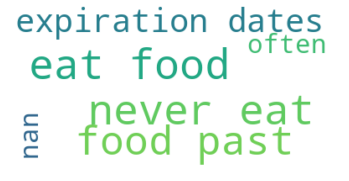

In [30]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Reason for waste

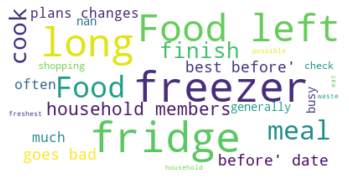

In [28]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Food Behaviour changes

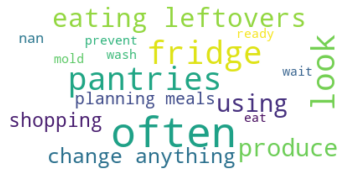

In [24]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text3)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()